Text(0.5, 1.0, 'Ownership Types of the Top 50 Largest Companies')

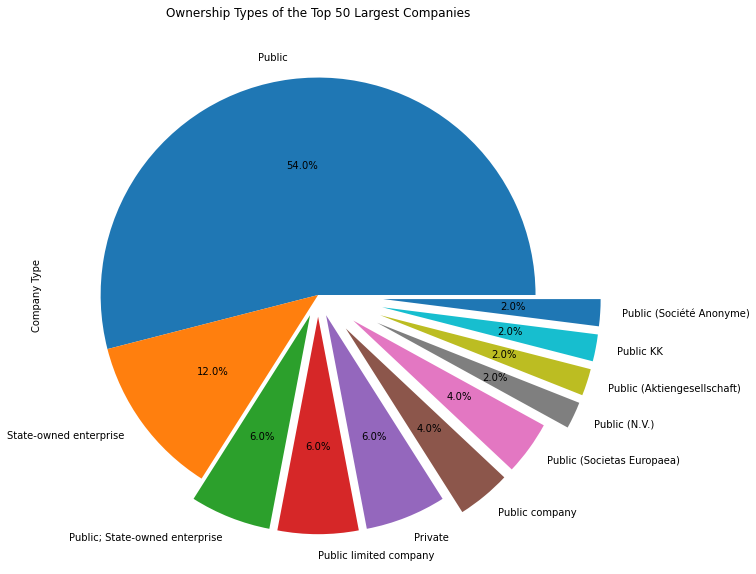

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import pi

company_type = pd.read_csv("company_type.csv")
type_occurences = company_type["Company Type"].value_counts()
explode = (0, 0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3)
type_occurences.plot.pie(y='Company Type', figsize=(10, 10),autopct='%1.1f%%', explode = explode)

plt.title("Ownership Types of the Top 50 Largest Companies")

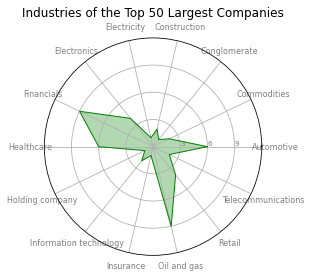

In [2]:
company_total = pd.read_csv("company_total.csv")
industries_occurence = company_total.groupby("Industry").count()["Rank"]
industries = industries_occurence.index
num_angles = len(industries)
occurences = industries_occurence.append(pd.Series(industries_occurence[0]))
angles = [n / float(num_angles) * 2 * pi for n in range(num_angles)]
angles += angles[:1]
 
axes = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], industries, color='grey', size=8)
 
axes.set_rlabel_position(0)
plt.yticks([3,6,9], ["3","6","9"], color="grey", size=7)
plt.ylim(0,12)

axes.plot(angles, occurences, 'g', linewidth=1, linestyle='solid')

axes.fill(angles, occurences, 'g', alpha=0.3)

plt.title('Industries of the Top 50 Largest Companies')

plt.show()

In [ ]:
import plotly.express as px
from iso_code_dict import cc3_cn

company_total = pd.read_csv("company_total.csv")
origin_occurences = pd.DataFrame(company_total.groupby("Country").count()["Employees"])

origin_occurences = origin_occurences.rename(columns = {"Employees":"Number of Fortune 500 HQs"})
list_origins = origin_occurences.index.tolist()

list_iso_codes = []
for country in list_origins:
    list_iso_codes.append(cc3_cn[country])

origin_occurences["ISO Code"] = list_iso_codes

fig = px.choropleth(origin_occurences, locations="ISO Code",
                    color="Number of Fortune 500 HQs", 
                    hover_name=origin_occurences.index, 
                    color_continuous_scale=px.colors.sequential.Teal, title = "Headquarters Locations of the Top 50 Largest Companies")
fig.show()